In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

In [2]:
retail_data = pd.read_csv('dataset/Train.csv')

In [3]:
retail_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
retail_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [5]:
#There are 7 Categorical Feature which later need to be encoded 
#First we will find missing values

retail_data.isnull().sum()


Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [6]:
retail_data['Item_Weight'].mean()

12.857645184136183

In [7]:
#replacing the item weight with the mean value of the item weight
retail_data['Item_Weight'].fillna(retail_data['Item_Weight'].mean(), inplace = True)

In [8]:
#Replacing the Outlet_Size missing values with the mode

retail_mode = retail_data.pivot_table(values='Outlet_Size', columns = 'Outlet_Type', aggfunc = (lambda x: x.mode()[0]))
missing_retail_values = retail_data['Outlet_Size'].isnull()
#replacing the missing values based on the mode of Outlet size based on the Outlet Type an
retail_data.loc[missing_retail_values, 'Outlet_Size'] = retail_data.loc[missing_retail_values, 'Outlet_Type'].apply(lambda x: retail_mode[x])

In [9]:
retail_data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [10]:
retail_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


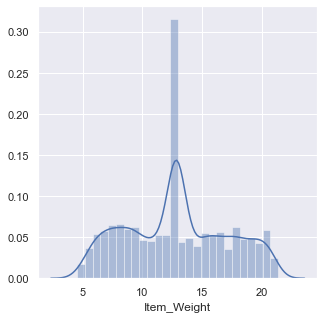

In [11]:
sns.set()
plt.figure(figsize=(5,5))
sns.distplot(retail_data['Item_Weight'])
plt.show()

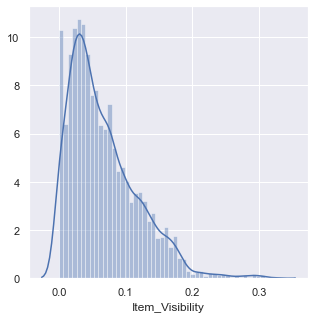

In [12]:
plt.figure(figsize=(5,5))
sns.distplot(retail_data['Item_Visibility'])
plt.show()

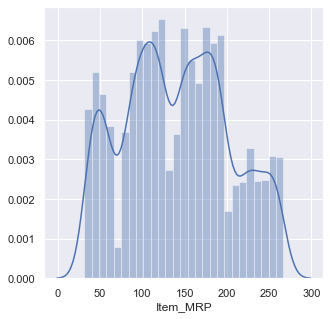

In [13]:
plt.figure(figsize=(5,5))
sns.distplot(retail_data['Item_MRP'])
plt.show()

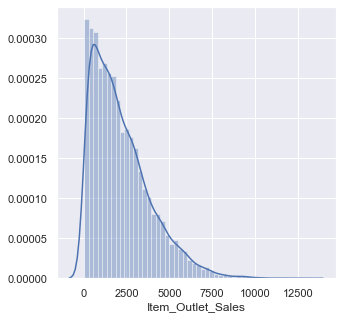

In [14]:
plt.figure(figsize=(5,5))
sns.distplot(retail_data['Item_Outlet_Sales'])
plt.show()

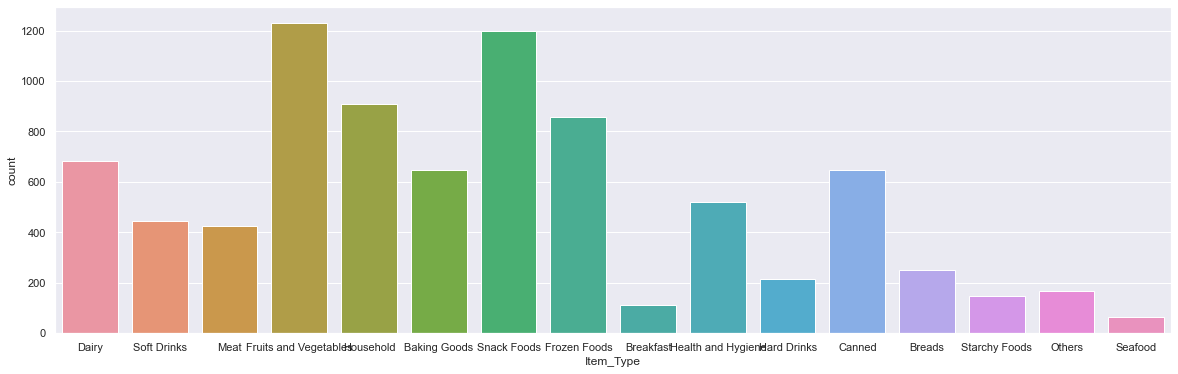

In [15]:
plt.figure(figsize=(20,6))
sns.countplot(x='Item_Type', data=retail_data)
plt.show()

In [16]:
retail_data['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [17]:
retail_data.replace({'Item_Fat_Content': {'low fat':'Low Fat', 'LF':'Low Fat', 'reg':'Regular'}}, inplace = True)

In [18]:
retail_data['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [19]:
retail_data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [20]:
retail_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [21]:
encoder = LabelEncoder()

In [22]:
#Now we will encode the categorical data using the Label Encoder

retail_data['Item_Identifier'] = encoder.fit_transform(retail_data['Item_Identifier'])
retail_data['Item_Fat_Content'] = encoder.fit_transform(retail_data['Item_Fat_Content'])
retail_data['Item_Type'] = encoder.fit_transform(retail_data['Item_Type'])
retail_data['Outlet_Identifier'] = encoder.fit_transform(retail_data['Outlet_Identifier'])
retail_data['Outlet_Size'] = encoder.fit_transform(retail_data['Outlet_Size'])
retail_data['Outlet_Location_Type'] = encoder.fit_transform(retail_data['Outlet_Location_Type'])
retail_data['Outlet_Type'] = encoder.fit_transform(retail_data['Outlet_Type'])

In [23]:
retail_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998,2,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052


In [24]:
#Splitting features and Labels for Training
x = retail_data.drop(columns='Item_Outlet_Sales', axis=1)
y = retail_data['Item_Outlet_Sales']

In [25]:
#Splitting the Training and testing Data 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=16)

In [26]:
model = XGBRegressor()

In [27]:
#Training The Model 
model.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [29]:
#Making Predictions and Evaluating the Model 
training_pred = model.predict(x_train)
testing_pred = model.predict(x_test)

re_train = metrics.r2_score(y_train, training_pred)
re_test = metrics.r2_score(y_test, testing_pred)

print('R^2 Error (Training): ', re_train)
print('R^2 Error (Testing): ', re_test)

R^2 Error (Training):  0.877438458088739
R^2 Error (Testing):  0.47151970928785336
